In [3]:
import cv2
import pandas as pd
import numpy as np
import heapq
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from skimage.metrics import structural_similarity as ssim

In [4]:
train_path = '../fashionmnist/fashion-mnist_train.csv'
private_path = './private_test_data.csv'
train = pd.read_csv(train_path)
grouped_train = train.groupby('label')
private = pd.read_csv(private_path)
train = train.drop(['label'],axis = 1)
private = private.drop(['label'],axis = 1)
print(train.shape)
print(private.shape)

(60000, 784)
(15000, 784)


In [5]:
train=np.array(train)
train=train.reshape(60000,28,28)
train=list(train)
private=np.array(private)
private=private.reshape(15000,28,28)
private=list(private)

In [6]:
def cal_sim(img1, img2):
    return ssim(img1, img2, data_range=8)

In [9]:
#res_result = []
cross_train = set()
start = 500; end = 1000
for pri_ind in range(start,end):
    max_sim_ind = []
    img1 = private[pri_ind]
    max_sim, max_sim_ind = -1, -13
    for train_ind in range(60000):
        sim = ssim(img1, train[train_ind], data_range=8)
        if (max_sim < sim):
            max_sim = sim; max_sim_ind = train_ind
    print(f"now private index... {pri_ind}")
    #res_result.append([img1, train[max_sim_ind[0][1]]])
    cross_train.add(max_sim_ind)

now private index... 500
now private index... 501
now private index... 502
now private index... 503
now private index... 504
now private index... 505
now private index... 506
now private index... 507
now private index... 508
now private index... 509
now private index... 510
now private index... 511
now private index... 512
now private index... 513
now private index... 514
now private index... 515
now private index... 516
now private index... 517
now private index... 518
now private index... 519
now private index... 520
now private index... 521
now private index... 522
now private index... 523
now private index... 524
now private index... 525
now private index... 526
now private index... 527
now private index... 528
now private index... 529
now private index... 530
now private index... 531
now private index... 532
now private index... 533
now private index... 534
now private index... 535
now private index... 536
now private index... 537
now private index... 538
now private index... 539


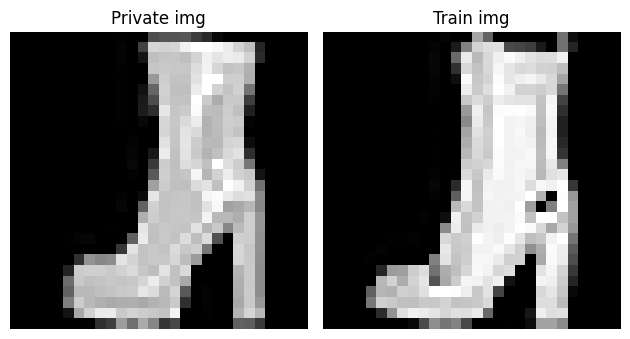

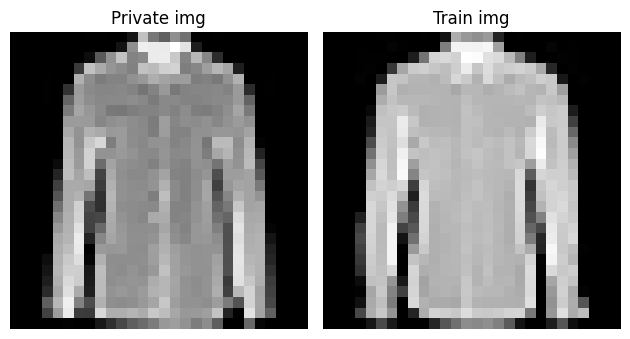

In [34]:
'''
for i in range(len(res_result)):
    image1, image2 = res_result[i]
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

    # 첫 번째 이미지 표시
    ax0 = plt.subplot(gs[0])
    ax0.imshow(image1, cmap='gray')
    ax0.set_title('Private img')
    ax0.axis('off')
    ax1 = plt.subplot(gs[1])
    ax1.imshow(image2, cmap='gray')
    ax1.set_title('Train img')
    ax1.axis('off')
    # 이미지 간의 간격 조정
    plt.tight_layout()

    # 플롯 보여주기
    plt.show()
'''

In [11]:
cross_train = list(cross_train)
with open(f'./{start}~{end}결과.txt', 'w') as file:
        for i in range(len(cross_train)):
            file.write(f"{cross_train[i]}\n")

- .txt 파일들 하나로 교집합하기

In [1]:
file_lst = ["0~500결과", "500~1000결과", "1000~2000결과","2000~4000결과", "4000~6000결과", "6000~10000결과",
            "10000~12500결과", "12500~14112결과", "14112~15000결과"] #"
result_set = set()
for file_name in file_lst:
    with open(f"{file_name}.txt", 'r') as file:
        for ind in file.readlines():
            result_set.add(int(ind))
print(len(result_set))
result_set = list(result_set)
with open(f'./결과통합.txt', 'w') as file:
        for i in range(len(result_set)):
            file.write(f"{result_set[i]}\n")

9414
